In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
kcpp = pd.read_csv('kc_house_data.csv')

In [5]:
kcpp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
kcpp.dropna(inplace=True)

In [7]:
kcpp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
kcpp.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
kcpp.dropna(inplace=True)

In [10]:
kcpp.shape

(21611, 21)

# Univariate Analysis

In [11]:
kcpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [12]:
kcpp.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
kcpp.date.dtypes

dtype('O')

<AxesSubplot:xlabel='price', ylabel='Density'>

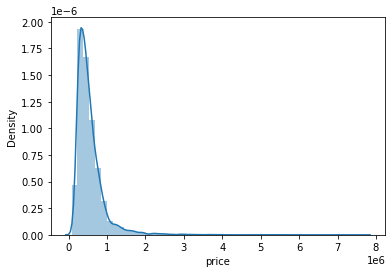

In [14]:
sns.distplot(kcpp.price)

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

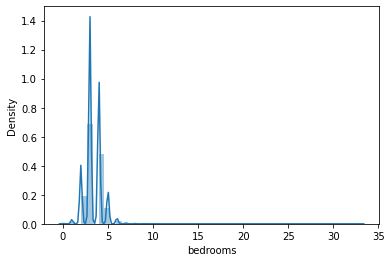

In [15]:
sns.distplot(kcpp.bedrooms)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

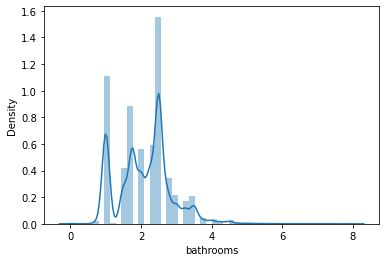

In [16]:
sns.distplot(kcpp.bathrooms)


In [17]:
kcpp.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

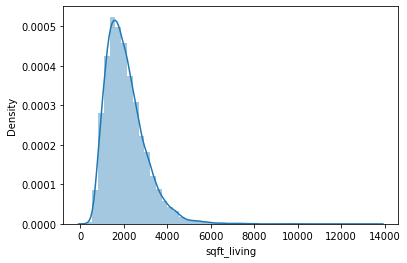

In [18]:
sns.distplot(kcpp.sqft_living)

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

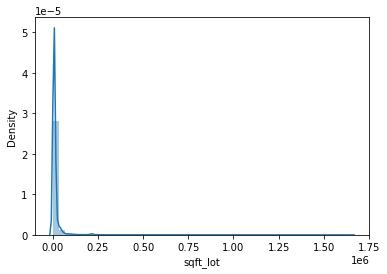

In [19]:
sns.distplot(kcpp.sqft_lot)

<AxesSubplot:xlabel='floors', ylabel='Density'>

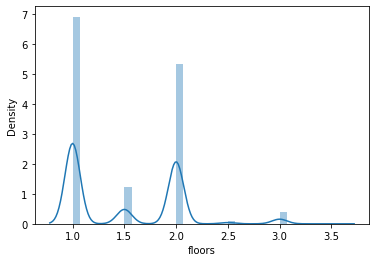

In [20]:
sns.distplot(kcpp.floors)

<function matplotlib.pyplot.show(close=None, block=None)>

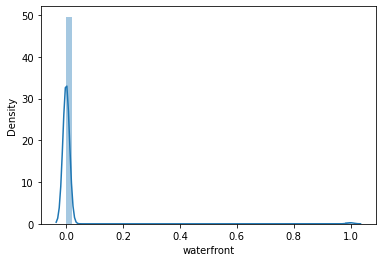

In [21]:
sns.distplot(kcpp.waterfront)


plt.show


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

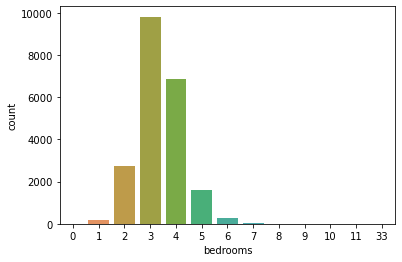

In [22]:
sns.countplot(kcpp.bedrooms)

### what is the number of houses having the maximum number of floors?

<AxesSubplot:xlabel='floors', ylabel='count'>

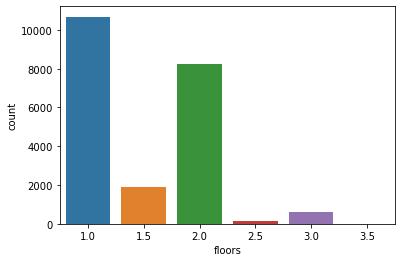

In [23]:
sns.countplot(kcpp.floors)

In [24]:
kcpp.floors.value_counts()

1.0    10679
2.0     8241
1.5     1909
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

<AxesSubplot:xlabel='sqft_living', ylabel='count'>

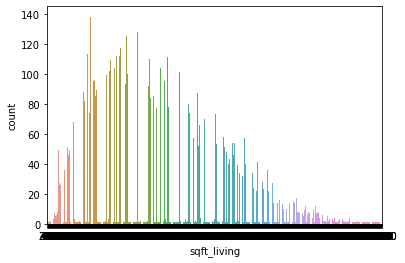

In [25]:
sns.countplot(kcpp.sqft_living)


In [26]:
kcpp.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1010    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

<AxesSubplot:xlabel='sqft_living'>

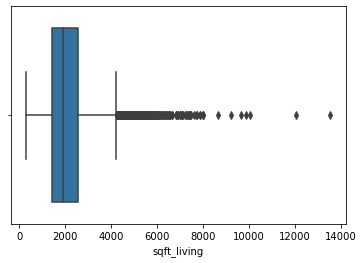

In [27]:
sns.boxplot(kcpp.sqft_living)

In [28]:
kcpp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
kcpp[kcpp['sqft_living']>1200].sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
5130      1
3847      1
1788      1
7420      1
1425      1
Name: sqft_living, Length: 926, dtype: int64

In [30]:
kcpp.corr().style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016742,0.001243,0.005237,-0.012166,-0.132110,0.018484,-0.002722,0.011590,-0.023846,0.008165,-0.010830,-0.004983,0.021442,-0.016910,-0.008303,-0.001905,0.020856,-0.002866,-0.138798
price,-0.016742,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.001243,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.005237,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,-0.012166,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,-0.132110,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.018484,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,-0.002722,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.011590,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,-0.023846,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397


In [31]:
kcpp.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


In [32]:
kcpp.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [33]:
kcpp.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
kcpp[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].corr().style.background_gradient()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.702055,0.089661,0.605567,0.323842,0.585377,0.082448
sqft_living,0.702055,1.000000,0.172841,0.876644,0.434925,0.756440,0.183301
sqft_lot,0.089661,0.172841,1.000000,0.183511,0.015301,0.144605,0.718556
sqft_above,0.605567,0.876644,0.183511,1.000000,-0.051976,0.731871,0.194048
sqft_basement,0.323842,0.434925,0.015301,-0.051976,1.000000,0.200341,0.017292
sqft_living15,0.585377,0.756440,0.144605,0.731871,0.200341,1.000000,0.183188
sqft_lot15,0.082448,0.183301,0.718556,0.194048,0.017292,0.183188,1.000000


In [35]:
kcpp[['price','sqft_living','grade','sqft_above','sqft_living15','bathrooms']].corr().style.background_gradient()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
price,1.000000,0.702055,0.667434,0.605567,0.585377,0.525150
sqft_living,0.702055,1.000000,0.762727,0.876644,0.756440,0.754684
grade,0.667434,0.762727,1.000000,0.755924,0.713197,0.664981
sqft_above,0.605567,0.876644,0.755924,1.000000,0.731871,0.685363
sqft_living15,0.585377,0.756440,0.713197,0.731871,1.000000,0.568626
bathrooms,0.525150,0.754684,0.664981,0.685363,0.568626,1.000000


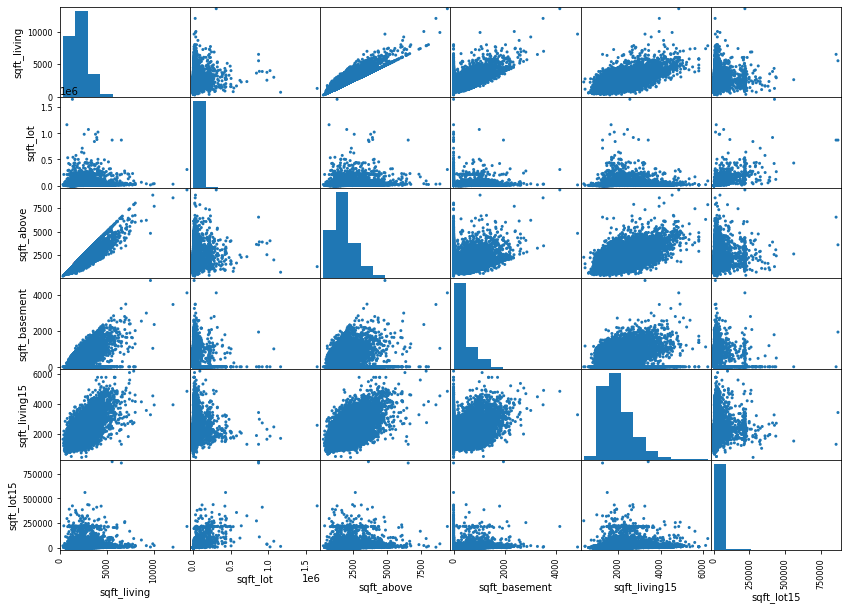

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(kcpp[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']],alpha = 1,figsize=(14,10),
               diagonal = 'hist')
plt.show()

<AxesSubplot:xlabel='bedrooms'>

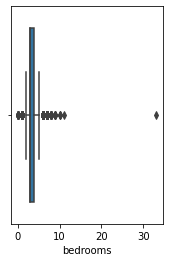

In [37]:
plt.subplot(1, 2, 1)
sns.boxplot(kcpp["bedrooms"])

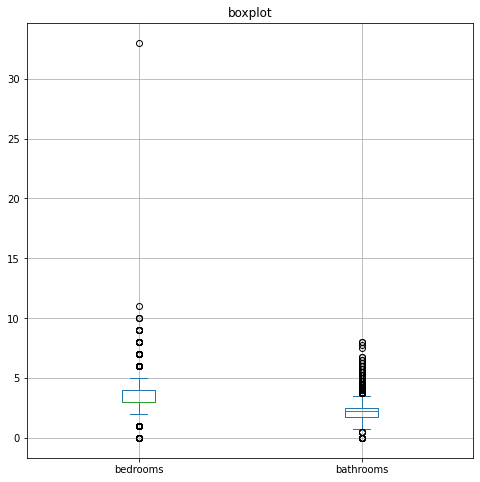

In [38]:
ax = kcpp[['bedrooms', 'bathrooms']].plot(kind='box', title='boxplot',figsize=(8,8),grid=True)


<AxesSubplot:title={'center':'boxplot'}>

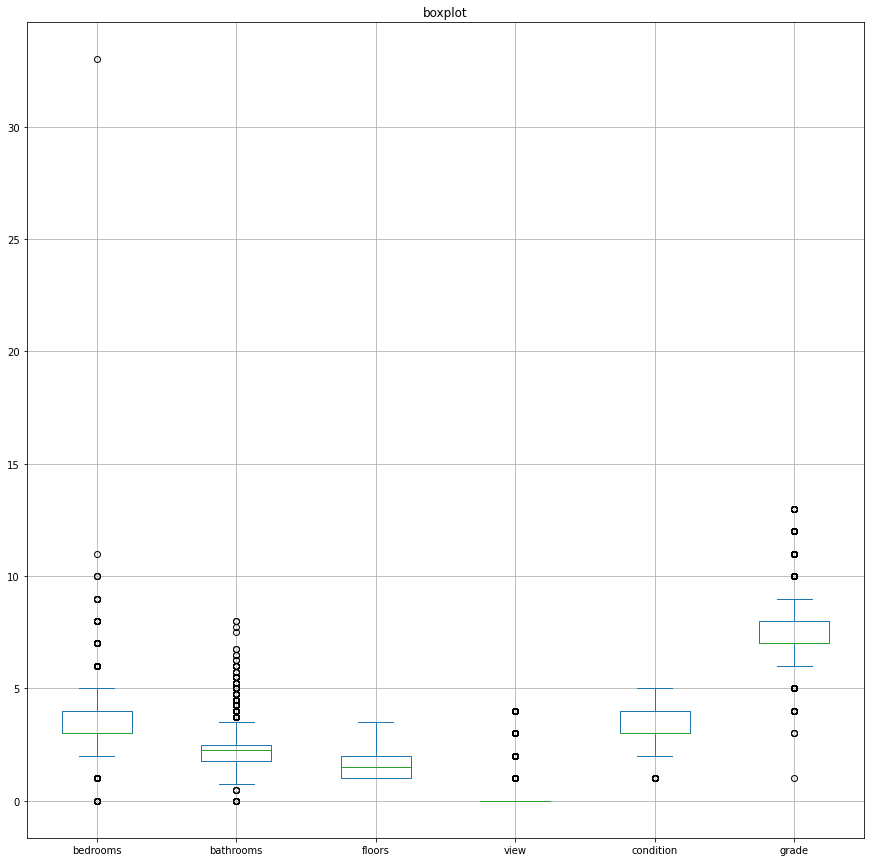

In [39]:
ax = kcpp[['bedrooms', 'bathrooms',"floors","view","condition","grade"]].plot(kind='box', title='boxplot',figsize=(15,15),grid=True)
ax


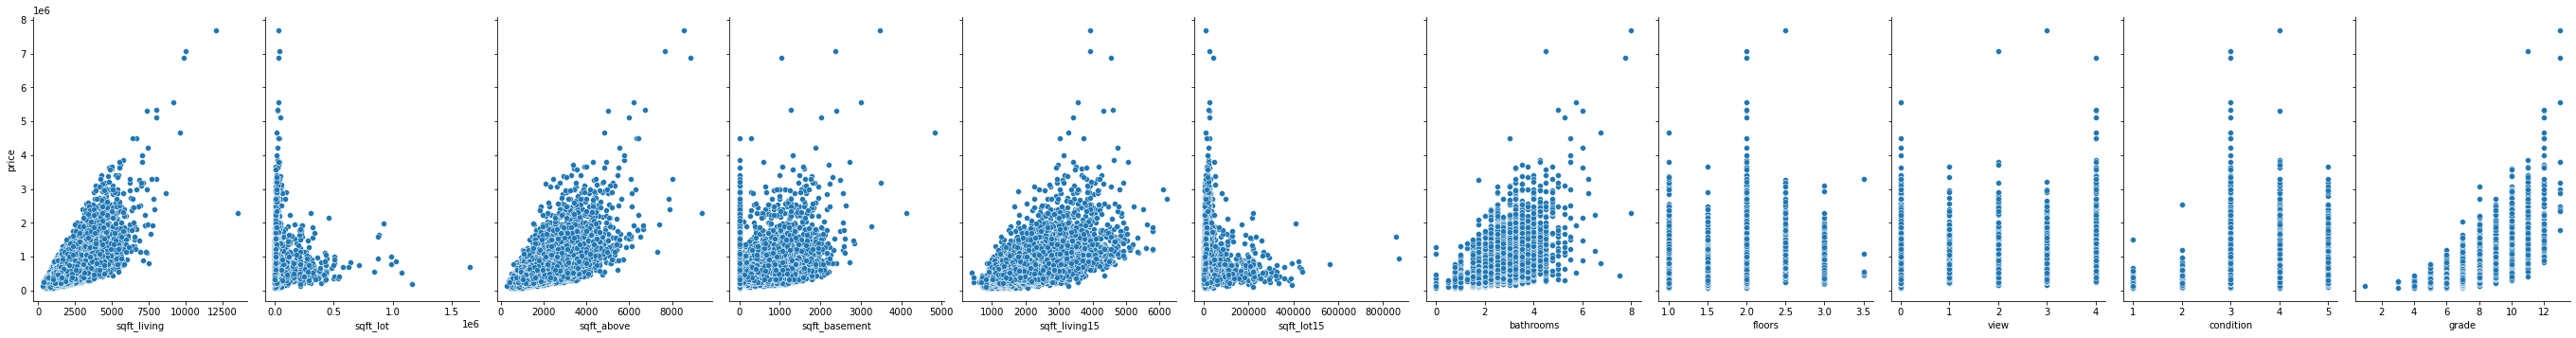

In [40]:
sns.pairplot(kcpp,x_vars=['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15', 'bathrooms',"floors","view","condition","grade"],y_vars="price",height=5,aspect=0.7)

# Base Line Model:

# Train test split-validation

In [41]:
x=kcpp.drop(["price",'date','zipcode'],axis=1)
y=kcpp.price

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_test.shape

(4323, 18)

In [44]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [45]:
y_train.shape

(12966,)

In [46]:
x_train.shape

(12966, 18)

In [47]:
linmod=LinearRegression()
linmod

LinearRegression()

In [48]:
fit=linmod.fit(x_train,y_train)

In [49]:
ytrain_predicted=linmod.predict(x_train)

### MAPE on Train data

In [50]:
MAPE = np.mean(np.abs((y_train - ytrain_predicted)/y_train))*100
MAPE

24.980834933208058

### MAE on Train data

In [51]:
MAE = np.mean(np.abs(y_train - ytrain_predicted))
MAE

123589.68029422172

In [52]:
fit.coef_

array([-1.50347768e-06, -3.51990859e+04,  4.85588789e+04,  1.00734063e+02,
        1.31775901e-01, -2.58367209e+03,  5.65074549e+05,  5.21646513e+04,
        2.98096487e+04,  9.78148738e+04,  6.76109634e+01,  3.31231000e+01,
       -2.37549162e+03,  2.05234466e+01,  5.59690187e+05, -1.07958500e+05,
        2.98089905e+01, -4.07514095e-01])

In [53]:
fit.intercept_

-35829795.96556024

In [54]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([336430.90103412, 947647.51411812, 423379.36322673, ...,
       507716.84507759, 276460.29419716, 352745.832722  ])

In [55]:
y_predicted_train=linmod.predict(x_train)
y_predicted_train

array([415679.77611375, 120155.72855727, 389535.45689818, ...,
       489930.58290119, 360009.86128277, 308547.29856743])

In [56]:
linmod.score(x_valid, y_valid)

0.6780841984240285

In [57]:
import sklearn.model_selection as sm

In [58]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_valid,y_predicted))
RMSE

208648.17127783265

In [59]:
MAPE = np.mean(np.abs((y_valid - y_predicted)/y_valid))*100
MAPE

25.40208155843095

In [60]:
MAE = np.mean(np.abs(y_valid - y_predicted))
MAE

126944.57401737316

In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_predicted_train)*100
r2

69.63895963571349

In [62]:
linmod.score(x_train, y_train)

0.6963895963571349

# Feature Scaling

# Model 1:

## Log Transformation

In [63]:
kcpp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
kcpp["log_price"]=np.log(kcpp['price'])
kcpp["log_sqftliv"]=np.log(kcpp['sqft_living'])
kcpp["log_sqftabo"]=np.log(kcpp['sqft_above'])
kcpp["log_sqftlot"]=np.log(kcpp['sqft_lot'])
kcpp["log_sqftlot15"]=np.log(kcpp['sqft_lot15'])
kcpp["log_sqftliv15"]=np.log(kcpp['sqft_living15'])

In [65]:
kcpp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542


In [66]:
x=kcpp.drop(['id','log_price','price','date','zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15'],axis=1)
y=kcpp.log_price

In [67]:
x.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'log_sqftliv', 'log_sqftabo', 'log_sqftlot', 'log_sqftlot15',
       'log_sqftliv15'],
      dtype='object')

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
x_test.shape

(4323, 17)

In [70]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [71]:
y_train.shape

(12966,)

In [72]:
x_train.shape

(12966, 17)

In [73]:
#from sklearn.linear_model import LinearRegression

In [74]:
linmod=LinearRegression()
linmod

LinearRegression()

In [75]:
linmod.fit(x_train,y_train)

LinearRegression()

In [76]:
ytrain_predicted=linmod.predict(x_train)

### MAPE on Train data

In [77]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.790546058252538

### MAE on Train data

In [78]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

108197.78016548514

In [79]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.65823416, 13.74632749, 13.01865619, ..., 13.00587905,
       12.62400119, 12.79874188])

In [80]:
linmod.score(x_train, y_train)

0.7689728376765467

In [81]:
#import sklearn.model_selection as sm

In [82]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

191173.06558538176

In [83]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

19.672993646038332

In [84]:
MAE = np.mean(np.abs(np.exp(y_valid) - np.exp(y_predicted)))
MAE

109316.5884136906

In [85]:
# from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

### MAPE on Train data

In [86]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.790546058252538

### MAE on Train data

In [87]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

108197.78016548514

In [88]:
y_valid


1853     12.254863
1344     13.500735
20510    13.235692
4305     12.660328
13014    12.807653
           ...    
5464     12.757080
8674     12.890873
13427    13.161584
8173     12.498742
20271    12.765660
Name: log_price, Length: 4322, dtype: float64

In [89]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.65823416, 13.74632749, 13.01865619, ..., 13.00587905,
       12.62400119, 12.79874188])

In [90]:
linmod.score(x_valid, y_valid)

0.767663305844094

In [91]:
#import sklearn.model_selection as sm

In [92]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

191173.06558538176

In [93]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

19.672993646038332

In [94]:
MAE = np.mean(np.abs(y_valid - y_predicted))
MAE

0.1949914174774086

In [95]:
# #from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

# Model 2:

## Log & Square Transformation

In [96]:
kcpp["log_price"]=np.log(kcpp['price'])
kcpp["log_sqftliv"]=np.log(kcpp['sqft_living'])
kcpp["log_sqftabo"]=np.log(kcpp['sqft_above'])
kcpp["log_sqftlot"]=np.log(kcpp['sqft_lot'])
kcpp["log_sqftlot15"]=np.log(kcpp['sqft_lot15'])
kcpp["log_sqftliv15"]=np.log(kcpp['sqft_living15'])
kcpp["sq_bedrooms"]=(kcpp['bedrooms'])**2
kcpp["sq_bathrooms"]=(kcpp['bathrooms'])**2

In [97]:
kcpp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15,sq_bedrooms,sq_bathrooms
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425,9,1.0000
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484,9,5.0625
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387,4,1.0000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240,16,9.0000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542,9,4.0000


In [98]:
x=kcpp.drop(['log_price','bathrooms',"bedrooms",'price','date','zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15'],axis=1)
y=kcpp.log_price

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
x_test.shape

(4323, 18)

In [101]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [102]:
y_train.shape

(12966,)

In [103]:
x_train.shape

(12966, 18)

In [104]:
#from sklearn.linear_model import LinearRegression

In [105]:
linmod=LinearRegression()
linmod

LinearRegression()

In [106]:
linmod.fit(x_train,y_train)

LinearRegression()

In [107]:
ytrain_predicted=linmod.predict(x_train)

### MAPE on Train data

In [108]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.80054894629821

### MAE on Train data

In [109]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

108373.92507157687

In [110]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.66942714, 13.72779969, 13.01673274, ..., 13.03345683,
       12.62069596, 12.79905145])

In [111]:
linmod.score(x_valid, y_valid)

0.7682913808651284

In [112]:
#import sklearn.model_selection as sm

In [113]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

189629.89507423833

In [114]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

19.65069683008159

In [115]:
MAE = np.mean(np.abs(np.exp(y_valid) - np.exp(y_predicted)))
MAE

109092.9097424734

In [116]:
# #from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

In [117]:
linmod.score(x_train, y_train)

0.7691552908507044

# Model 3:

## Log & Square Transformation by adding new variable

In [118]:
kcpp["log_price"]=np.log(kcpp['price'])
kcpp["log_sqftliv"]=np.log(kcpp['sqft_living'])
kcpp["log_sqftabo"]=np.log(kcpp['sqft_above'])
kcpp["log_sqftlot"]=np.log(kcpp['sqft_lot'])
kcpp["log_sqftlot15"]=np.log(kcpp['sqft_lot15'])
kcpp["log_sqftliv15"]=np.log(kcpp['sqft_living15'])
kcpp["sq_bedrooms"]=(kcpp['bedrooms'])**2
kcpp["sq_bathrooms"]=(kcpp['bathrooms'])**2
kcpp["log_yr_built"]=np.log(kcpp['yr_built'])

In [119]:
kcpp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15,sq_bedrooms,sq_bathrooms,log_yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425,9,1.0000,7.578145
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484,9,5.0625,7.576097
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387,4,1.0000,7.566828
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240,16,9.0000,7.583248
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542,9,4.0000,7.594381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1509,12.793859,7.333023,7.333023,7.030857,7.319202,7.333023,9,6.2500,7.605392
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,7200,12.899220,7.745003,7.745003,8.667852,8.881836,7.512071,16,6.2500,7.607878
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2007,12.904459,6.927558,6.927558,7.207860,7.604396,6.927558,4,0.5625,7.605392
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1287,12.899220,7.377759,7.377759,7.778211,7.160069,7.251345,9,6.2500,7.602900


In [120]:
kcpp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15,sq_bedrooms,sq_bathrooms,log_yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425,9,1.0000,7.578145
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484,9,5.0625,7.576097
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387,4,1.0000,7.566828
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240,16,9.0000,7.583248
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542,9,4.0000,7.594381


In [121]:
kcpp.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'log_sqftliv', 'log_sqftabo', 'log_sqftlot', 'log_sqftlot15',
       'log_sqftliv15', 'sq_bedrooms', 'sq_bathrooms', 'log_yr_built'],
      dtype='object')

In [122]:
x=kcpp.drop(['log_price','yr_built','bathrooms',"bedrooms",'price','date','zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15'],axis=1)
y=kcpp.log_price

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
x_test.shape

(4323, 18)

In [125]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [126]:
y_train.shape

(12966,)

In [127]:
x_train.shape

(12966, 18)

In [128]:
#from sklearn.linear_model import LinearRegression

In [129]:
linmod=LinearRegression()
linmod

LinearRegression()

In [130]:
linmod.fit(x_train,y_train)

LinearRegression()

In [131]:
ytrain_predicted=linmod.predict(x_train)

### MAPE on Train data

In [132]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.79070056696304

### MAE on Train data

In [133]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

108326.57846712571

In [134]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.66910717, 13.72962643, 13.01628977, ..., 13.03409589,
       12.62014722, 12.79984385])

In [135]:
linmod.score(x_valid, y_valid)

0.7684413239338225

In [136]:
#import sklearn.model_selection as sm

In [137]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

189587.73328541953

In [138]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

19.641793884639053

In [139]:
MAE = np.mean(np.abs(np.exp(y_valid) - np.exp(y_predicted)))
MAE

109054.92790467759

In [140]:
# #from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

In [141]:
linmod.score(x_train, y_train)

0.769323376089088

# Model 4:

## Log & Exponential Transformation

In [142]:
kcpp["log_price"]=np.log(kcpp['price'])
kcpp["log_sqftliv"]=np.log(kcpp['sqft_living'])
kcpp["log_sqftabo"]=np.log(kcpp['sqft_above'])
kcpp["log_sqftlot"]=np.log(kcpp['sqft_lot'])
kcpp["log_sqftlot15"]=np.log(kcpp['sqft_lot15'])
kcpp["log_sqftliv15"]=np.log(kcpp['sqft_living15'])
kcpp["sq_bedrooms"]=np.exp((kcpp['bedrooms']))
kcpp["sq_bathrooms"]=np.exp((kcpp['bathrooms']))
kcpp["log_yr_built"]=np.log(kcpp['yr_built'])

In [143]:
kcpp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15,sq_bedrooms,sq_bathrooms,log_yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425,20.085537,2.718282,7.578145
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484,20.085537,9.487736,7.576097
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387,7.389056,2.718282,7.566828
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240,54.598150,20.085537,7.583248
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542,20.085537,7.389056,7.594381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1509,12.793859,7.333023,7.333023,7.030857,7.319202,7.333023,20.085537,12.182494,7.605392
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,7200,12.899220,7.745003,7.745003,8.667852,8.881836,7.512071,54.598150,12.182494,7.607878
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2007,12.904459,6.927558,6.927558,7.207860,7.604396,6.927558,7.389056,2.117000,7.605392
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1287,12.899220,7.377759,7.377759,7.778211,7.160069,7.251345,20.085537,12.182494,7.602900


In [144]:
kcpp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,log_price,log_sqftliv,log_sqftabo,log_sqftlot,log_sqftlot15,log_sqftliv15,sq_bedrooms,sq_bathrooms,log_yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,5650,12.309982,7.073270,7.073270,8.639411,8.639411,7.200425,20.085537,2.718282,7.578145
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7639,13.195614,7.851661,7.682482,8.887653,8.941022,7.432484,20.085537,9.487736,7.576097
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,8062,12.100712,6.646391,6.646391,9.210340,8.994917,7.908387,7.389056,2.718282,7.566828
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,5000,13.311329,7.580700,6.956545,8.517193,8.517193,7.215240,54.598150,20.085537,7.583248
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,7503,13.142166,7.426549,7.426549,8.997147,8.923058,7.495542,20.085537,7.389056,7.594381


In [145]:
x=kcpp.drop(['log_price','yr_built','bathrooms',"bedrooms",'price','date','zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15'],axis=1)
y=kcpp.log_price

In [146]:
x.columns

Index(['id', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_renovated', 'lat', 'long', 'log_sqftliv',
       'log_sqftabo', 'log_sqftlot', 'log_sqftlot15', 'log_sqftliv15',
       'sq_bedrooms', 'sq_bathrooms', 'log_yr_built'],
      dtype='object')

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
x_test.shape

(4323, 18)

In [149]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [150]:
y_train.shape

(12966,)

In [151]:
x_train.shape

(12966, 18)

In [152]:
#from sklearn.linear_model import LinearRegression

In [153]:
linmod=LinearRegression()
linmod

LinearRegression()

In [154]:
linmod.fit(x_train,y_train)

LinearRegression()

In [155]:
ytrain_predicted=linmod.predict(x_train)

### MAPE on Train data

In [156]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.952584977443703

### MAE on Train data

In [157]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

109090.39344267256

In [158]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.66684114, 13.72354391, 13.02148733, ..., 13.08055314,
       12.59598831, 12.81603924])

In [159]:
linmod.score(x_valid, y_valid)

0.7651696696538048

In [160]:
#import sklearn.model_selection as sm

In [161]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

193025.7305271569

In [162]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

19.811597332544604

In [163]:
MAE = np.mean(np.abs(np.exp(y_valid) - np.exp(y_predicted)))
MAE

110049.40265882768

In [164]:
# #from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

In [165]:
linmod.score(x_train, y_train)

0.7656164653697793

# Model 5:

## Log & Square Transformation by adding Dummy variable(Zipcode)

In [166]:
kcpp["log_price"]=np.log(kcpp['price'])
kcpp["log_sqftliv"]=np.log(kcpp['sqft_living'])
kcpp["log_sqftabo"]=np.log(kcpp['sqft_above'])
kcpp["log_sqftlot"]=np.log(kcpp['sqft_lot'])
kcpp["log_sqftlot15"]=np.log(kcpp['sqft_lot15'])
kcpp["log_sqftliv15"]=np.log(kcpp['sqft_living15'])
kcpp["sq_bedrooms"]=(kcpp['bedrooms'])**2
kcpp["sq_bathrooms"]=(kcpp['bathrooms'])**2
kcpp["log_yr_built"]=np.log(kcpp['yr_built'])

In [167]:
dummies = pd.get_dummies(kcpp["zipcode"],drop_first=False)
kcpp= pd.concat([kcpp,dummies],axis = "columns")

In [168]:
kcpp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
kcpp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
kcpp.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
          'sqft_lot15',     'log_price',   'log_sqftliv',   'log_sqftabo',
         'log_sqftlot', 'log_sqftlot15', 'log_sqftliv15',   'sq_bedrooms',
        'sq_bathrooms',  'log_yr_built',           98001,           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,  

In [171]:
x=kcpp.drop(['log_price','yr_built','bathrooms',"bedrooms",'price','date','zipcode','sqft_living','sqft_lot','sqft_above','sqft_living15', 'sqft_lot15'],axis=1)
y=kcpp.log_price

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [173]:
x_test.shape

(4323, 88)

In [174]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [175]:
y_train.shape

(12966,)

In [176]:
x_train.shape

(12966, 88)

In [177]:
#from sklearn.linear_model import LinearRegression

In [178]:
linmod=LinearRegression()
linmod

LinearRegression()

In [179]:
linmod.fit(x_train,y_train)

LinearRegression()

In [180]:
y_predicted_train=linmod.predict(x_train)

### MAPE on Train data

In [181]:
MAPE = np.mean(np.abs((np.exp(y_train) - np.exp(ytrain_predicted))/np.exp(y_train)))*100
MAPE

19.952584977443703

### MAE on Train data

In [182]:
MAE = np.mean(np.abs(np.exp(y_train) - np.exp(ytrain_predicted)))
MAE

109090.39344267256

In [183]:
y_predicted=linmod.predict(x_valid)
y_predicted

array([12.65918344, 13.21757007, 13.12546769, ..., 13.13500208,
       12.46861882, 12.80253618])

In [184]:
linmod.score(x_valid, y_valid)

0.8828622887057952

In [185]:
#import sklearn.model_selection as sm

In [186]:
#from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_predicted)))
RMSE

134303.84897060643

In [187]:
MAPE = np.mean(np.abs((np.exp(y_valid) - np.exp(y_predicted))/np.exp(y_valid)))*100
MAPE

13.352673944246998

In [188]:
MAE = np.mean(np.abs(np.exp(y_valid) - np.exp(y_predicted)))
MAE

73923.48340058472

In [189]:
# #from sklearn.metrics import r2_score
# r2 = r2_score(np.exp(y_train),np.exp(y_predicted_train))*100
# r2

In [190]:
linmod.score(x_train, y_train)

0.8848686469327951

In [191]:
linmod=LinearRegression()

In [192]:
linmod.fit(x_test,y_test)

LinearRegression()

In [193]:
y_predicted_test=linmod.predict(x_test)
y_predicted_test

array([13.0564901 , 13.2178679 , 12.38465458, ..., 12.04740581,
       13.44229811, 13.43341119])

# TEST DATA  R2

In [194]:
# r2 = r2_score(np.exp(y_test),np.exp(y_predicted_test))*100
# r2
linmod.score(x_test, y_test)


0.8877163537543551

# MAPE on Test data

In [195]:
MAPE = np.mean(np.abs(np.exp(y_test) - np.exp(y_predicted_test))/np.exp(y_test))*100
MAPE

13.445555863333286

# MAE on Test data

In [196]:
MAE = np.mean(np.abs(np.exp(y_test) - np.exp(y_predicted_test)))
MAE

73727.87796256325